In [ ]:
'''
Implement logistic regression Python /R to perform using
classification on Social_Network_Ads.csv dataset.
Compute Confusion matrix to findTP,FP,TN,FN,Accuracy,Errorrate,Precision,
Recall on the given dataset.
'''
import pandas as pd
import numpy as np

from google.colab import files
files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


{'Social_Network_Ads.csv': b'User ID,Gender,Age,EstimatedSalary,Purchased\r\n15624510,Male,19,19000,0\r\n15810944,Male,35,20000,0\r\n15668575,Female,26,43000,0\r\n15603246,Female,27,57000,0\r\n15804002,Male,19,76000,0\r\n15728773,Male,27,58000,0\r\n15598044,Female,27,84000,0\r\n15694829,Female,32,150000,1\r\n15600575,Male,25,33000,0\r\n15727311,Female,35,65000,0\r\n15570769,Female,26,80000,0\r\n15606274,Female,26,52000,0\r\n15746139,Male,20,86000,0\r\n15704987,Male,32,18000,0\r\n15628972,Male,18,82000,0\r\n15697686,Male,29,80000,0\r\n15733883,Male,47,25000,1\r\n15617482,Male,45,26000,1\r\n15704583,Male,46,28000,1\r\n15621083,Female,48,29000,1\r\n15649487,Male,45,22000,1\r\n15736760,Female,47,49000,1\r\n15714658,Male,48,41000,1\r\n15599081,Female,45,22000,1\r\n15705113,Male,46,23000,1\r\n15631159,Male,47,20000,1\r\n15792818,Male,49,28000,1\r\n15633531,Female,47,30000,1\r\n15744529,Male,29,43000,0\r\n15669656,Male,31,18000,0\r\n15581198,Male,31,74000,0\r\n15729054,Female,27,137000,1\r\n1

In [ ]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['Gender']=label_encoder.fit_transform(df['Gender'])
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df['EstimatedSalary']=scaler.fit_transform(df[['EstimatedSalary']])
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,0.029630,0
1,15810944,1,35,0.037037,0
2,15668575,0,26,0.207407,0
3,15603246,0,27,0.311111,0
4,15804002,1,19,0.451852,0


In [ ]:
x=df.drop(columns=['User ID','Purchased'])
y=df['Purchased']

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

cm=confusion_matrix(y_test,y_pred)

TN,FP,FN,TP=cm.ravel()

accuracy=accuracy_score(y_test,y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display results
print("Confusion Matrix:")
print(cm)
print(f"True Positive (TP): {TP}")
print(f"False Positive (FP): {FP}")
print(f"True Negative (TN): {TN}")
print(f"False Negative (FN): {FN}")
print(f"Accuracy: {accuracy}")
print(f"Error Rate: {error_rate}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

'''
Confusion Matrix:
[[50  2]
 [ 5 23]]
True Positive (TP): 23
False Positive (FP): 2
True Negative (TN): 50
False Negative (FN): 5
Accuracy: 0.9125
Error Rate: 0.08750000000000002
Precision: 0.92
Recall: 0.8214285714285714
F1 Score: 0.8679245283018868


Term	Meaning
True Positive (TP)	You correctly predicted Positive (23 times)
False Positive (FP)	You predicted Positive, but it was actually Negative (2 times)
True Negative (TN)	You correctly predicted Negative (50 times)
False Negative (FN)	You predicted Negative, but it was actually Positive (5 times)

Metric	Value	Meaning
Accuracy	0.9125	91.25% of total predictions are correct. Good overall performance.
Error Rate	0.0875	8.75% of predictions were wrong.
Precision	0.92	Of all predicted Positives, 92% were correct. Low false positives.
Recall	0.8214	You captured 82.14% of actual Positives. Missed some Positives (FN=5).
F1 Score	0.8679	Harmonic mean of precision and recall — good balance between both.
'''

Confusion Matrix:
[[50  2]
 [ 5 23]]
True Positive (TP): 23
False Positive (FP): 2
True Negative (TN): 50
False Negative (FN): 5
Accuracy: 0.9125
Error Rate: 0.08750000000000002
Precision: 0.92
Recall: 0.8214285714285714
F1 Score: 0.8679245283018868


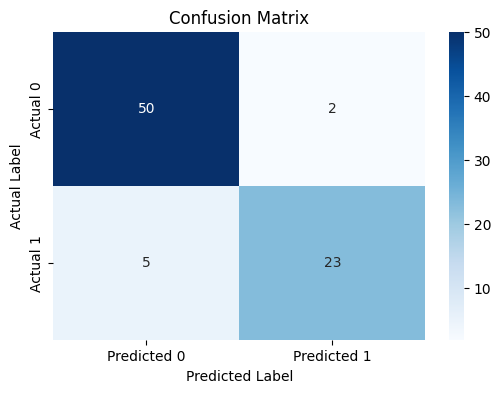

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'],yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()